<a href="https://colab.research.google.com/github/PRAN20/Data-Analaysis-ML/blob/main/Data_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis**

# **Importing Header Files**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# **Importing DataBase**

In [2]:
data = pd.read_csv('board_games.csv')

# **Splitting into Test set and Training Set**

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [4]:
train.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
6168,41933,"In the year 2097, the entire Earth was envelop...",//cf.geekdo-images.com/images/pic1114682.jpg,5,60,12,2,45,Arctic Scavengers,60,//cf.geekdo-images.com/images/pic1114682_t.jpg,2009,"Matt Burton,Martin Hoffmann","Bluffing,Card Game,Fighting",Arctic Scavengers: Base Game+HQ+Recon,Robert K. Gabhart,"Arctic Scavengers: HQ,Arctic Scavengers: Recon","Arctic Scavengers,Arctic Theme","Card Drafting,Deck / Pool Building,Hand Manage...","Driftwood Games,Rio Grande Games,Ystari Games",6.97479,2182
9652,173090,Players in The Game try to discard all 98 card...,//cf.geekdo-images.com/images/pic2405167.jpg,5,20,8,1,20,The Game,20,//cf.geekdo-images.com/images/pic2405167_t.jpg,2015,"Oliver Freudenreich,Sandra Freudenreich","Card Game,Number",The Game on Fire (compilation),Steffen Benndorf,The Game on Fire (expansion),Solitaire Games,"Co-operative Play,Hand Management","Nürnberger-Spielkarten-Verlag,dV Giochi,Game F...",6.75647,3480
5007,25224,"In a distant land, many and many years ago, ro...",//cf.geekdo-images.com/images/pic143036.jpg,5,120,12,2,90,Hermagor,120,//cf.geekdo-images.com/images/pic143036_t.jpg,2006,Czarnè,"Economic,Medieval,Transportation",NaN,Emanuele Ornella,NaN,NaN,"Area Control / Area Influence,Auction/Bidding,...","Mind the Move,Quined White Goblin Games,Rio Gr...",6.92051,1643
7409,103843,Game description from the publisher:&#10;&#10;...,//cf.geekdo-images.com/images/pic1054173.jpg,6,30,8,2,30,Fandooble,30,//cf.geekdo-images.com/images/pic1054173_t.jpg,2011,Fian Arroyo,Fantasy,NaN,Mike Richie,NaN,Animals: Dragons,"Dice Rolling,Press Your Luck",Mindtwister USA,6.09375,80
3030,6946,Strategy &amp; Tactics magazine #47.&#10;&#10;...,//cf.geekdo-images.com/images/pic2666458.jpg,1,120,12,1,120,Wolfpack,120,//cf.geekdo-images.com/images/pic2666458_t.jpg,1974,Redmond A. Simonsen,"Nautical,Wargame,World War II",NaN,Jim Dunnigan,NaN,"Magazine: Strategy & Tactics,Solitaire Games,S...","Dice Rolling,Hex-and-Counter","SPI (Simulations Publications, Inc.)",6.05192,156


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8425 entries, 6168 to 2732
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         8425 non-null   int64  
 1   description     8425 non-null   object 
 2   image           8424 non-null   object 
 3   max_players     8425 non-null   int64  
 4   max_playtime    8425 non-null   int64  
 5   min_age         8425 non-null   int64  
 6   min_players     8425 non-null   int64  
 7   min_playtime    8425 non-null   int64  
 8   name            8425 non-null   object 
 9   playing_time    8425 non-null   int64  
 10  thumbnail       8424 non-null   object 
 11  year_published  8425 non-null   int64  
 12  artist          6187 non-null   object 
 13  category        8346 non-null   object 
 14  compilation     322 non-null    object 
 15  designer        8331 non-null   object 
 16  expansion       2189 non-null   object 
 17  family          6170 non-null 

In [6]:
train.isnull().sum().sort_values()

game_id              0
year_published       0
average_rating       0
playing_time         0
name                 0
min_playtime         0
users_rated          0
min_age              0
max_playtime         0
max_players          0
description          0
min_players          0
image                1
thumbnail            1
publisher            2
category            79
designer            94
mechanic           751
artist            2238
family            2255
expansion         6236
compilation       8103
dtype: int64


## **Data Cleaning and Feature Engineering: Categorical Data**

In [7]:
train.describe(include='object').T

,count,unique,top,freq
description,8425,8423,"Hoplomachus [ha-ploh-ma-kuss], or &quot;Hoplo&...",2
image,8424,8422,//cf.geekdo-images.com/images/pic2262580.png,2
name,8425,8314,Robin Hood,5
thumbnail,8424,8422,//cf.geekdo-images.com/images/pic2262580_t.png,2
artist,6187,3881,Franz Vohwinkel,141
category,8346,3310,"Wargame,World War II",364
compilation,322,269,Pyramid Arcade,6
designer,8331,3978,(Uncredited),442
expansion,2189,2106,"Règlement de l'An XXX,Regulations of the Year ...",7
family,6170,3321,Crowdfunding: Kickstarter,312


In [8]:
df = train.copy()

In [9]:
df.drop(['game_id', 'description', 'image', 'name',
         'thumbnail', 'family', 'expansion', 'compilation'],
         axis=1, inplace=True)

# **Counts derived from category aggregates**

In [10]:
category_cols = df.select_dtypes(np.object).columns
for cat in category_cols:
    num_unique_values = len(set(','.join(df[cat].dropna()).replace(', ', ',').split(',')))
    print(f'Number of unique values of {cat}:\t\t{num_unique_values}')

Number of unique values of artist:		5416
Number of unique values of category:		83
Number of unique values of designer:		4476
Number of unique values of mechanic:		51
Number of unique values of publisher:		3045


In [11]:
for cat in category_cols:
    df['num_' + cat] = [np.nan if x is np.nan 
                               else len(x) + 1 
                               for x in df[cat].str.findall(',')]
df.drop(['artist', 'designer', 'publisher'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)
df.shape

(5701, 16)


# **Categories derived from category aggregates**


In [13]:
def value_list(data: pd.DataFrame, col: str) -> list:
    value_set = set(','.join(df[col].dropna()).replace(', ', ',').split(','))
    repr_list = [x.lower() for x in list(value_set)]
    return repr_list

def create_dummies(data: pd.DataFrame, col: str, key_word: str) -> list:
    
    word_list = [1 if (x is not np.nan) and (key_word in str(x).lower())
                 else 0 if (x is not np.nan) and (key_word not in str(x).lower())
                 else np.nan for x in data[col]]
    return word_list


def dummy_loop(data: pd.DataFrame, col: str) -> pd.DataFrame:
    
    for value in value_list(data, col):
        data[col + '_' + value] = create_dummies(data=data, col=col, key_word=value)
    
    data.drop(col, axis=1, inplace=True)
    return data

In [14]:
value_list(df, 'category')

['book',
 'sports',
 'renaissance',
 'post-napoleonic',
 'party game',
 'music',
 'transportation',
 'puzzle',
 'deduction',
 'expansion for base-game',
 'mafia',
 'trivia',
 'medical',
 'spies/secret agents',
 'economic',
 'mythology',
 'bluffing',
 'real-time',
 'humor',
 'collectible components',
 'zombies',
 'negotiation',
 'game system',
 'murder/mystery',
 'action / dexterity',
 'mature / adult',
 'video game theme',
 'dice',
 'territory building',
 "children's game",
 'age of reason',
 'american indian wars',
 'korean war',
 'arabian',
 'civil war',
 'fantasy',
 'number',
 'environmental',
 'abstract strategy',
 'city building',
 'world war i',
 'vietnam war',
 'modern warfare',
 'ancient',
 'electronic',
 'movies / tv / radio theme',
 'memory',
 'aviation / flight',
 'space exploration',
 'exploration',
 'maze',
 'racing',
 'industry / manufacturing',
 'american civil war',
 'farming',
 'adventure',
 'religious',
 'word game',
 'wargame',
 'card game',
 'print & play',
 'politi

In [15]:
value_list(df, 'mechanic')

['chit-pull system',
 'campaign / battle card driven',
 'modular board',
 'action / movement programming',
 'pattern recognition',
 'deck / pool building',
 'commodity speculation',
 'take that',
 'role playing',
 'action point allowance system',
 'paper-and-pencil',
 'auction/bidding',
 'voting',
 'stock holding',
 'storytelling',
 'acting',
 'simulation',
 'area control / area influence',
 'variable phase order',
 'pattern building',
 'trick-taking',
 'hand management',
 'dice rolling',
 'route/network building',
 'tile placement',
 'roll / spin and move',
 'singing',
 'crayon rail system',
 'card drafting',
 'press your luck',
 'partnerships',
 'pick-up and deliver',
 'betting/wagering',
 'memory',
 'simultaneous action selection',
 'point to point movement',
 'co-operative play',
 'secret unit deployment',
 'set collection',
 'variable player powers',
 'area enclosure',
 'worker placement',
 'rock-paper-scissors',
 'area movement',
 'line drawing',
 'trading',
 'area-impulse',
 'pl

In [16]:
df = dummy_loop(dummy_loop(df, 'category'), 'mechanic')
df.head()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated,num_artist,num_category,num_designer,num_mechanic,num_publisher,category_book,category_sports,category_renaissance,category_post-napoleonic,category_party game,category_music,category_transportation,category_puzzle,category_deduction,category_expansion for base-game,category_mafia,category_trivia,category_medical,category_spies/secret agents,category_economic,category_mythology,category_bluffing,category_real-time,category_humor,category_collectible components,category_zombies,category_negotiation,category_game system,category_murder/mystery,category_action / dexterity,category_mature / adult,...,mechanic_auction/bidding,mechanic_voting,mechanic_stock holding,mechanic_storytelling,mechanic_acting,mechanic_simulation,mechanic_area control / area influence,mechanic_variable phase order,mechanic_pattern building,mechanic_trick-taking,mechanic_hand management,mechanic_dice rolling,mechanic_route/network building,mechanic_tile placement,mechanic_roll / spin and move,mechanic_singing,mechanic_crayon rail system,mechanic_card drafting,mechanic_press your luck,mechanic_partnerships,mechanic_pick-up and deliver,mechanic_betting/wagering,mechanic_memory,mechanic_simultaneous action selection,mechanic_point to point movement,mechanic_co-operative play,mechanic_secret unit deployment,mechanic_set collection,mechanic_variable player powers,mechanic_area enclosure,mechanic_worker placement,mechanic_rock-paper-scissors,mechanic_area movement,mechanic_line drawing,mechanic_trading,mechanic_area-impulse,mechanic_player elimination,mechanic_grid movement,mechanic_time track,mechanic_hex-and-counter
6168,5,60,12,2,45,60,2009,6.97479,2182,2.0,3.0,1.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9652,5,20,8,1,20,20,2015,6.75647,3480,2.0,2.0,1.0,2.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5007,5,120,12,2,90,120,2006,6.92051,1643,1.0,3.0,1.0,5.0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7409,6,30,8,2,30,30,2011,6.09375,80,1.0,1.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3030,1,120,12,1,120,120,1974,6.05192,156,1.0,3.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
df.shape

(5701, 148)

In [18]:
game_categories = df.filter(regex='^category_', axis=1)
game_categories.columns

Index(['category_book', 'category_sports', 'category_renaissance',
       'category_post-napoleonic', 'category_party game', 'category_music',
       'category_transportation', 'category_puzzle', 'category_deduction',
       'category_expansion for base-game', 'category_mafia', 'category_trivia',
       'category_medical', 'category_spies/secret agents', 'category_economic',
       'category_mythology', 'category_bluffing', 'category_real-time',
       'category_humor', 'category_collectible components', 'category_zombies',
       'category_negotiation', 'category_game system',
       'category_murder/mystery', 'category_action / dexterity',
       'category_mature / adult', 'category_video game theme', 'category_dice',
       'category_territory building', 'category_children's game',
       'category_age of reason', 'category_american indian wars',
       'category_korean war', 'category_arabian', 'category_civil war',
       'category_fantasy', 'category_number', 'category_environmen

In [19]:
activity_categories = ['category_city building', 'category_civilization',
                       'category_educational', 'category_puzzle',
                       'category_racing', 'category_territory building',
                       'category_transportation']

component_categories = ['category_card game', 'category_collectible components',
                        'category_dice', 'category_electronic',
                        'category_miniatures']

nongame_categories = ['category_book', 'category_expansion for base-game',
                      'category_game system']

war_categories = list(df.filter(regex='war', axis=1).columns)
war_categories = war_categories + ['category_napoleonic', 'category_post-napoleonic',
                                   'category_pike and shot']

skills_categories = ['category_action / dexterity', 'category_bluffing',
                     'category_deduction', 'category_economic',
                     'category_math', 'category_number',
                     'category_memory', 'category_negotiation',
                     'category_real-time', 'category_spatial analysis',
                     'category_trivia', 'category_word game']

entertainment_categories = ['category_comic book / strip', 'category_movies / tv / radio theme',
                            'category_music', 'category_novel-based',
                            'category_video game theme']

nongroup_categories = ['category_party game', 'category_abstract strategy',
                       "category_children's game"]

In [20]:
def dummy_group(data: pd.DataFrame, category: list) -> list:
   
    for i in category:
        if i not in list(data.columns):
            category.remove(i)
    dummies = [1 if x >= 1 else 0 for x in data[category].sum(axis=1)]
    data.drop(category, axis=1, inplace=True)
    return dummies

def plot_bar(data: pd.DataFrame,
             prefix: str, figsize: tuple,
             title: str):
    category_df = (df
                   .filter(regex=prefix, axis=1)
                   .sum()
                   .to_frame('count')
                   .sort_values('count')
    )
    ax = category_df.plot.barh(legend=None, figsize=figsize, linewidth=0)
    ax.set_yticklabels(list(category_df.sort_values('count').index.str.replace(prefix,'')))
    ax.tick_params(labelsize=12)
    ax.set_title(title, fontsize=16)

In [21]:
df['category_activity'] = dummy_group(df, activity_categories)
df['category_component'] = dummy_group(df, component_categories)
df['category_nongame'] = dummy_group(df, nongame_categories)
df['category_war'] = dummy_group(df, war_categories)
df['category_skills'] = dummy_group(df, skills_categories)
df['category_entertainment'] = dummy_group(df, entertainment_categories)

df = df[df['category_nongame'] == 0]
df.drop('category_nongame', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


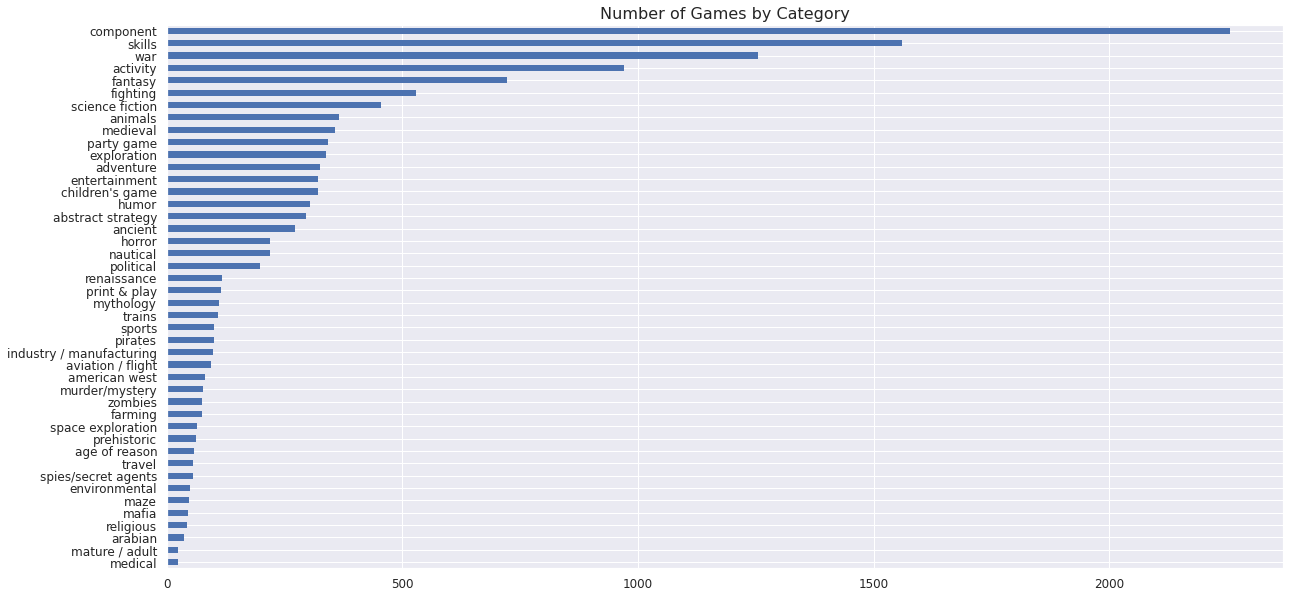

In [22]:
plot_bar(data=df,
         prefix='category_',
         figsize=(20,10),
         title='Number of Games by Category')

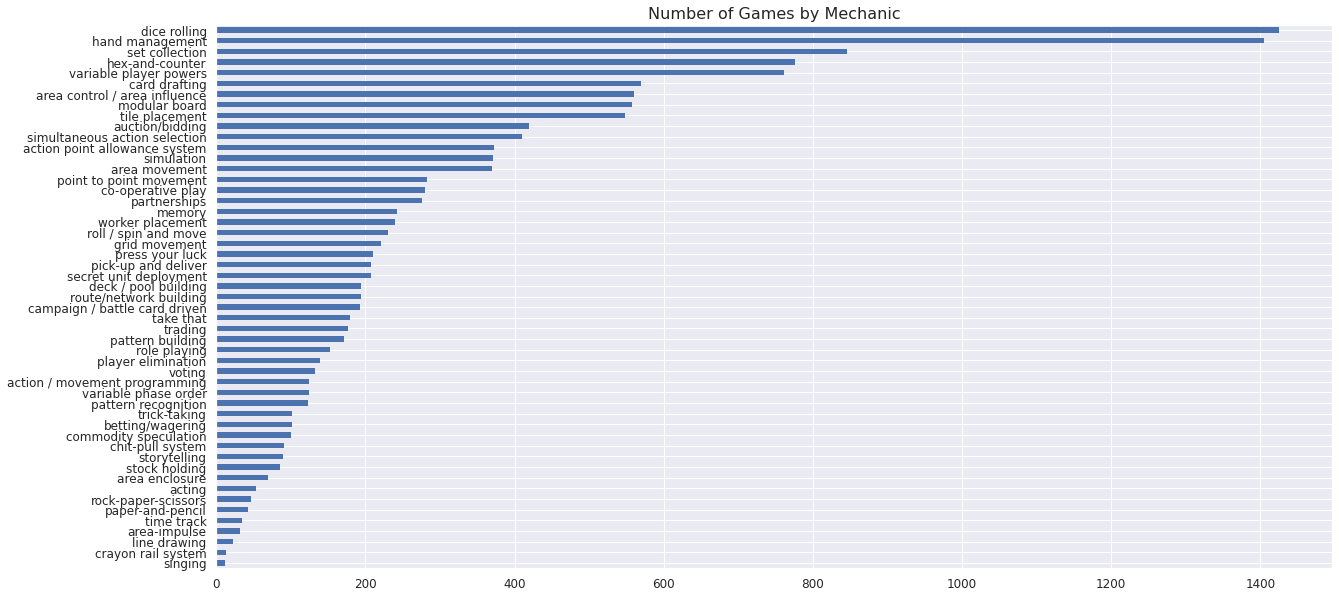

In [23]:
plot_bar(data=df,
         prefix='mechanic_',
         figsize=(20,10),
         title='Number of Games by Mechanic')

In [24]:
df.shape

(5608, 109)

# **Data Cleaning and Engineering: Numeric Data**

In [25]:
numeric_df = df.loc[:, ~df.isin([0,1]).all()]
numeric_df.shape

(5608, 14)

In [26]:
numeric_df.describe()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated,num_artist,num_category,num_designer,num_mechanic,num_publisher
count,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000,5608.000000
mean,5.010521,105.758559,9.955599,2.059379,91.313302,105.758559,2004.717725,6.546314,1166.660663,2.203994,2.651926,1.411733,2.600927,2.824893
std,7.543777,866.538797,3.301289,0.674542,848.267125,866.538797,11.284651,0.775103,3548.581155,7.690679,1.300462,0.802652,1.501255,3.683774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1951.000000,2.339400,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,30.000000,8.000000,2.000000,30.000000,30.000000,2001.000000,6.051200,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2009.000000,6.548855,237.000000,1.000000,2.000000,1.000000,2.000000,2.000000
75%,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2013.000000,7.065962,755.250000,2.000000,3.000000,2.000000,3.000000,3.000000
max,362.000000,60000.000000,25.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000,510.000000,14.000000,11.000000,12.000000,92.000000


In [27]:
df = df[(df.iloc[:,:6] > 0).all(axis=1)]

In [28]:
df['game_age'] = 2019 - df['year_published']
df.drop(['max_playtime', 'min_playtime', 'users_rated'], axis=1, inplace=True)

In [29]:
numeric_df = df.loc[:, ~df.isin([0,1]).all()]
numeric_df.shape

(5240, 12)

In [30]:
numeric_df.describe()

,max_players,min_age,min_players,playing_time,year_published,average_rating,num_artist,num_category,num_designer,num_mechanic,num_publisher,game_age
count,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000,5240.000000
mean,5.102290,10.471756,2.070611,101.502481,2004.554008,6.525332,2.213550,2.663740,1.406870,2.624046,2.909542,14.445992
std,7.753493,2.441990,0.666585,858.286053,11.397775,0.765409,7.936809,1.316168,0.794444,1.512648,3.783639,11.397775
min,1.000000,2.000000,1.000000,1.000000,1951.000000,2.339400,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,8.000000,2.000000,30.000000,2000.000000,6.036300,1.000000,2.000000,1.000000,1.000000,1.000000,6.000000
50%,4.000000,10.000000,2.000000,45.000000,2009.000000,6.525335,1.000000,2.000000,1.000000,2.000000,2.000000,10.000000
75%,6.000000,12.000000,2.000000,90.000000,2013.000000,7.032407,2.000000,3.000000,2.000000,3.000000,3.000000,19.000000
max,362.000000,25.000000,9.000000,60000.000000,2016.000000,9.003920,510.000000,14.000000,11.000000,12.000000,92.000000,68.000000


In [31]:
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

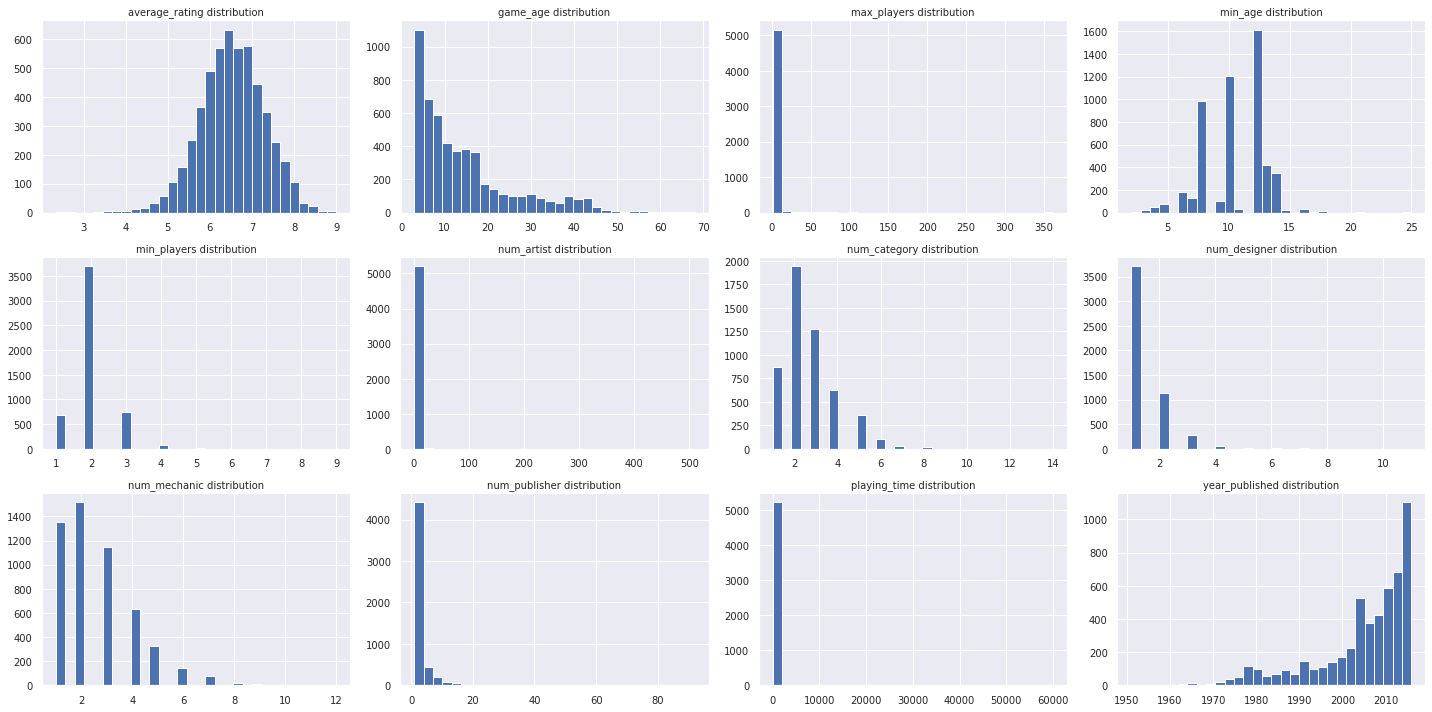

In [32]:
hist_loop(data=numeric_df,
          rows=3,
          cols=4,
          figsize=(20,10))

In [33]:
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    skew_vals = data.skew()

    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(skew_limit))
    )
    return skew_cols

In [34]:
skew_cols = skew_df(numeric_df, 0.75)
skew_cols

,Skew
playing_time,65.229893
num_artist,51.670589
max_players,24.374155
num_publisher,7.440751
num_designer,3.308256
min_players,2.043046
game_age,1.437833
num_mechanic,1.186188
num_category,1.110221
year_published,-1.437833


# **Log transformation for skewed variables**

In [35]:
for col in skew_cols.index.values:
    numeric_df['log_' + col] = numeric_df[col].apply(np.log1p)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
log_df = numeric_df.filter(regex='^log_', axis=1)
skew_log_cols = skew_df(log_df, 0.75)
skew_log_cols

,Skew
log_num_artist,2.491281
log_num_designer,1.770511
log_max_players,1.379365
log_num_publisher,1.361302
log_year_published,-1.451667


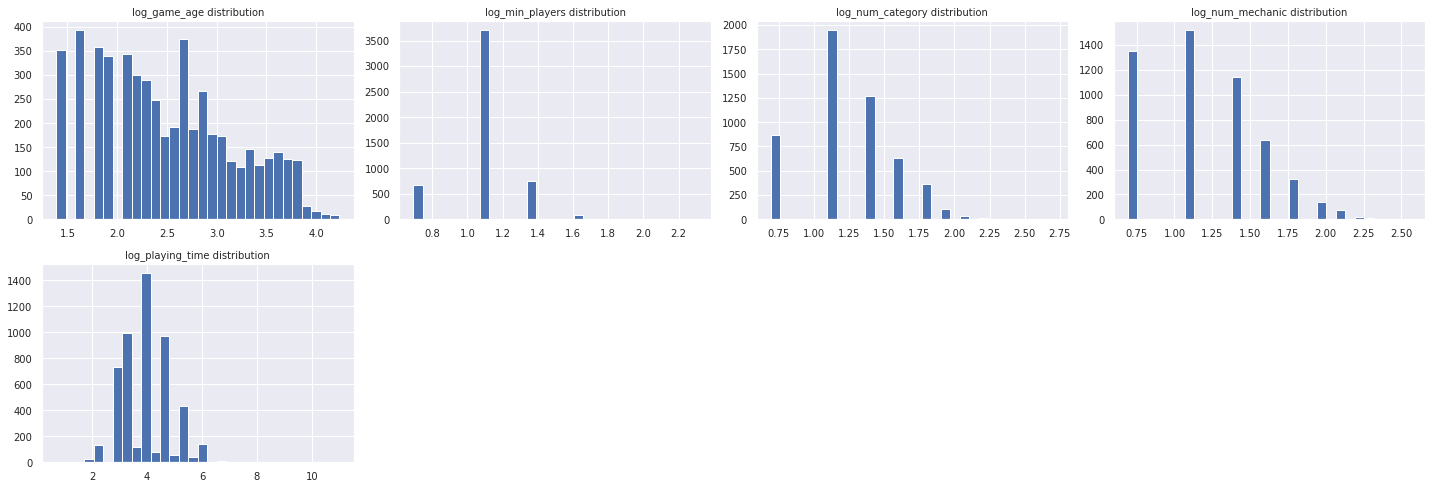

In [37]:
log_df = log_df.drop(skew_log_cols.index, axis=1)
hist_loop(data=log_df.copy(),
          rows=3,
          cols=4,
          figsize=(20,10))

In [38]:
df = df.join(log_df).drop([x.replace('log_', '') for x in log_df.columns], axis=1)

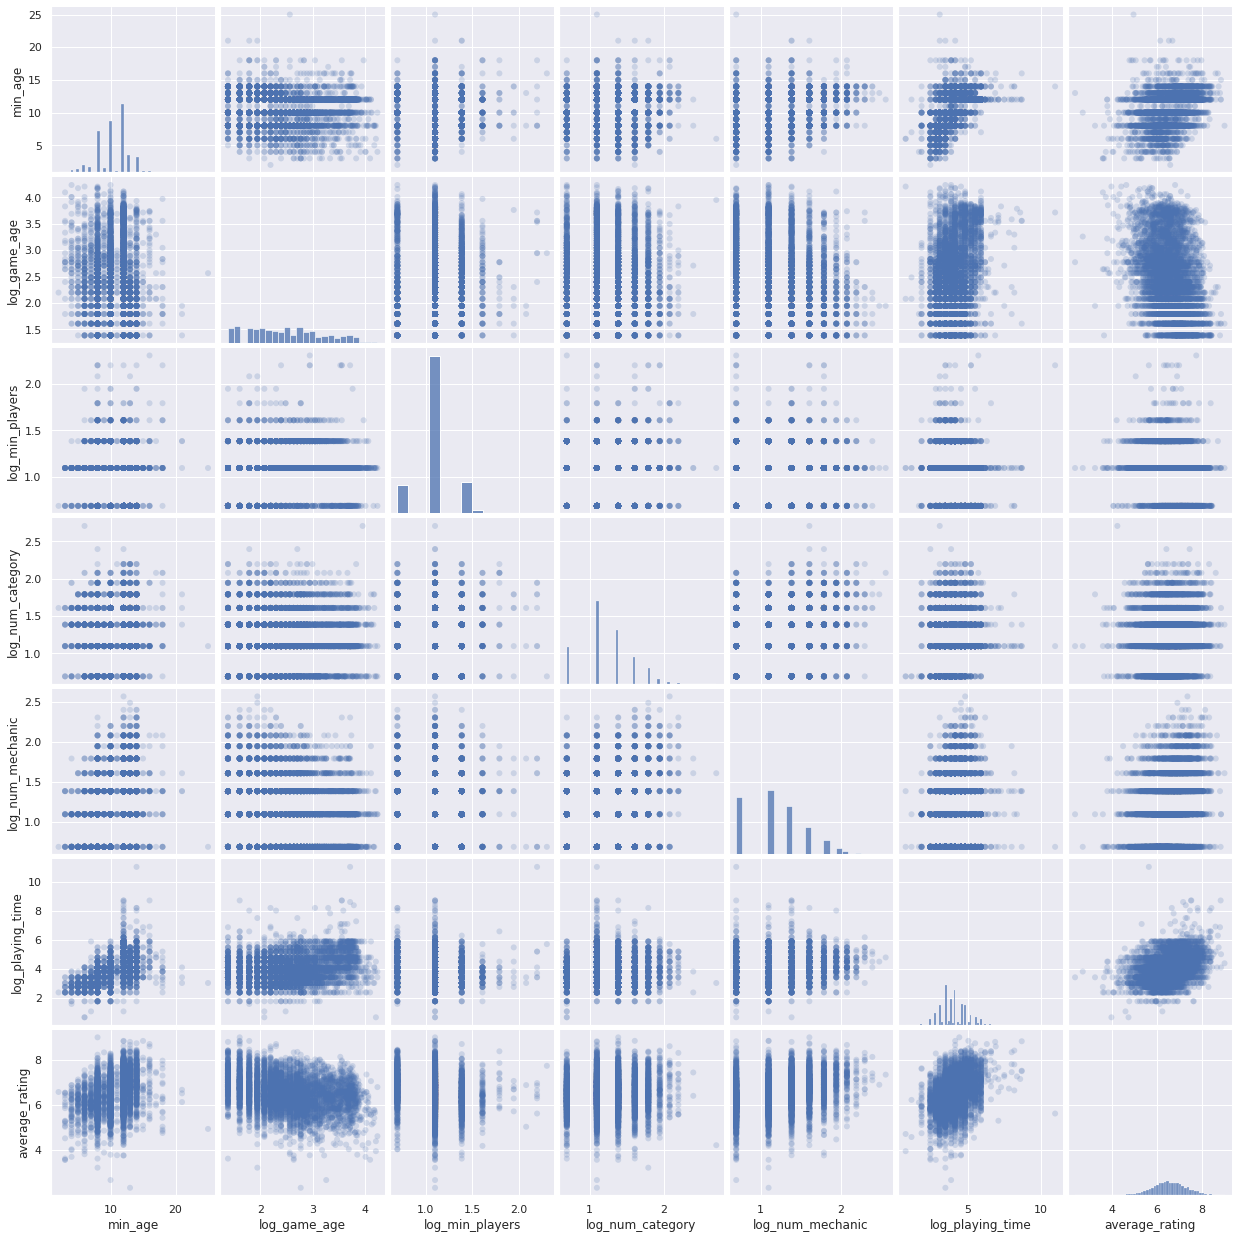

In [39]:
sns.pairplot(data=df, vars=['min_age', 'log_game_age', 'log_min_players', 'log_num_category',
                            'log_num_mechanic', 'log_playing_time', 'average_rating'],
             plot_kws=dict(alpha=.2, edgecolor='none'));



# **Adding polynomial and interaction terms**

In [40]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [41]:
feature_cols = ['min_age', 'log_game_age', 'log_min_players', 'log_num_category',
                'log_num_mechanic', 'log_playing_time']
features = df[feature_cols]
pf.fit(features)
feat_array = pf.transform(features)

feat_df = pd.DataFrame(feat_array,
                       index=df.index,
                       columns=pf.get_feature_names(input_features=features.columns))

feat_df.drop('1', axis=1, inplace=True)

feat_df.insert(0, 'average_rating', df['average_rating'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


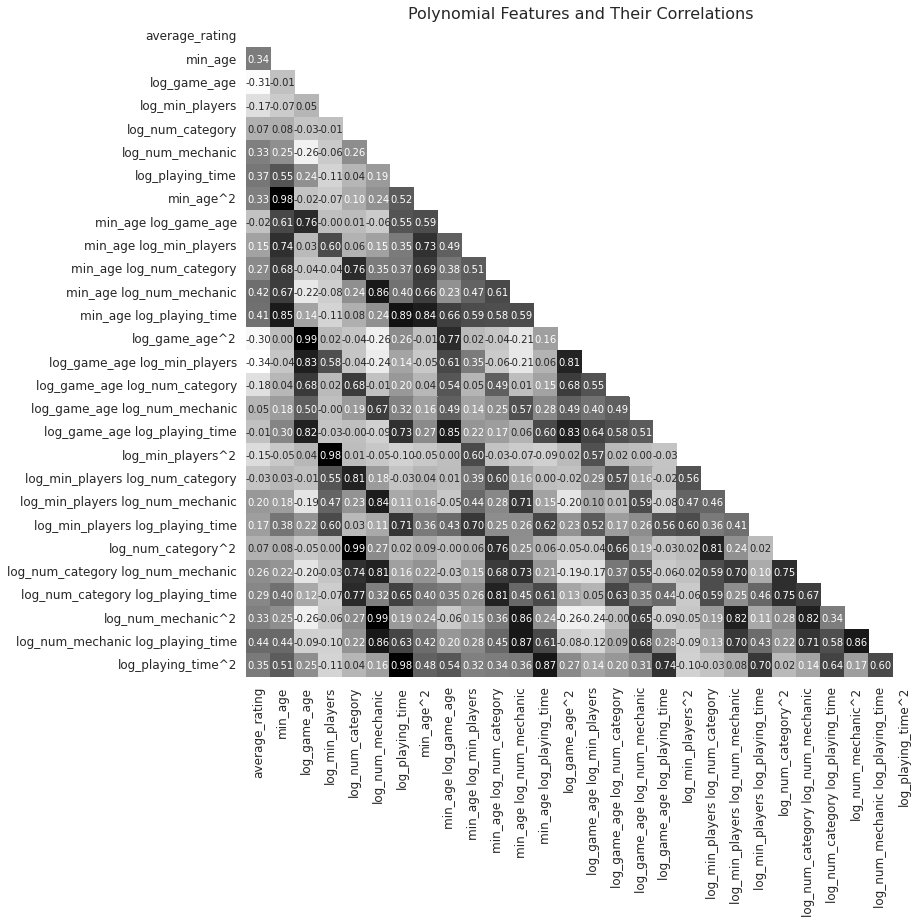

In [42]:
with sns.axes_style('white'):
    fig, axes = plt.subplots(figsize=(12,12))
    mask = np.triu(np.ones_like(feat_df.corr(), dtype=bool))
    sns.heatmap(feat_df.corr(),
                mask=mask,
                cmap='binary',
                cbar=False,
                annot=True,
                annot_kws={'size':10},
                fmt='.2f')
    plt.title('Polynomial Features and Their Correlations', fontsize=16)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

In [43]:
for col in feat_df.columns:
    if col in df.columns:
        feat_df.drop(col, axis=1, inplace=True)
df = df.join(feat_df)

# **Binning numeric data**


In [44]:
pd.qcut(df['num_artist'], q=4, duplicates='drop')

6168    (0.999, 2.0]
9652    (0.999, 2.0]
5007    (0.999, 2.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225    (2.0, 510.0]
4859    (0.999, 2.0]
9845    (0.999, 2.0]
2732    (0.999, 2.0]
Name: num_artist, Length: 5240, dtype: category
Categories (2, interval[float64, right]): [(0.999, 2.0] < (2.0, 510.0]]

In [45]:
df['group_artist'] = pd.qcut(df['num_artist'],
                             q=4,
                             duplicates='drop',
                             labels=['two_or_less', 'three_or_more'])
df.drop('num_artist', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_artist'], drop_first=True)

In [46]:
pd.qcut(df['num_designer'], q=4, duplicates='drop')

6168    (0.999, 2.0]
9652    (0.999, 2.0]
5007    (0.999, 2.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225     (2.0, 11.0]
4859    (0.999, 2.0]
9845    (0.999, 2.0]
2732    (0.999, 2.0]
Name: num_designer, Length: 5240, dtype: category
Categories (2, interval[float64, right]): [(0.999, 2.0] < (2.0, 11.0]]

In [47]:
df['group_designer'] = pd.qcut(df['num_designer'],
                               q=4,
                               duplicates='drop',
                               labels=['two_or_less', 'three_or_more'])
df.drop('num_designer', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_designer'], drop_first=True)

In [48]:
pd.qcut(df['num_publisher'], q=4, duplicates='drop')

6168      (2.0, 3.0]
9652     (3.0, 92.0]
5007     (3.0, 92.0]
7409    (0.999, 2.0]
3030    (0.999, 2.0]
            ...     
7891    (0.999, 2.0]
9225    (0.999, 2.0]
4859      (2.0, 3.0]
9845     (3.0, 92.0]
2732    (0.999, 2.0]
Name: num_publisher, Length: 5240, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 92.0]]

In [49]:
pd.qcut(df['num_publisher'], q=3, duplicates='drop')

6168    (0.999, 3.0]
9652     (3.0, 92.0]
5007     (3.0, 92.0]
7409    (0.999, 3.0]
3030    (0.999, 3.0]
            ...     
7891    (0.999, 3.0]
9225    (0.999, 3.0]
4859    (0.999, 3.0]
9845     (3.0, 92.0]
2732    (0.999, 3.0]
Name: num_publisher, Length: 5240, dtype: category
Categories (2, interval[float64, right]): [(0.999, 3.0] < (3.0, 92.0]]

In [50]:
df['group_publisher'] = pd.qcut(df['num_publisher'],
                                q=3,
                                duplicates='drop',
                                labels=['three_or_less', 'four_or_more'])
df.drop('num_publisher', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_publisher'], drop_first=True)

In [51]:
pd.qcut(df['max_players'], q=4, duplicates='drop')

6168      (4.0, 6.0]
9652      (4.0, 6.0]
5007      (4.0, 6.0]
7409      (4.0, 6.0]
3030    (0.999, 4.0]
            ...     
7891      (4.0, 6.0]
9225      (4.0, 6.0]
4859      (4.0, 6.0]
9845      (4.0, 6.0]
2732    (6.0, 362.0]
Name: max_players, Length: 5240, dtype: category
Categories (3, interval[float64, right]): [(0.999, 4.0] < (4.0, 6.0] < (6.0, 362.0]]

In [52]:
df['group_max_players'] = pd.qcut(df['max_players'],
                                  q=4,
                                  duplicates='drop',
                                  labels=['four_or_less', 'five_or_six', 'seven_or_more'])
df.drop('max_players', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_max_players'], drop_first=True)

In [53]:
pd.qcut(df['year_published'], q=4, duplicates='drop')

6168      (2000.0, 2009.0]
9652      (2013.0, 2016.0]
5007      (2000.0, 2009.0]
7409      (2009.0, 2013.0]
3030    (1950.999, 2000.0]
               ...        
7891      (2009.0, 2013.0]
9225      (2013.0, 2016.0]
4859      (2000.0, 2009.0]
9845      (2013.0, 2016.0]
2732    (1950.999, 2000.0]
Name: year_published, Length: 5240, dtype: category
Categories (4, interval[float64, right]): [(1950.999, 2000.0] < (2000.0, 2009.0] < (2009.0, 2013.0] <
                                           (2013.0, 2016.0]]

In [54]:
df['group_year_published'] = pd.qcut(df['year_published'],
                                     q=4,
                                     duplicates='drop',
                                     labels=['before_2001', 'between_2001_and_2009', 'between_2010_and_2013', 'between_2014_and_2016'])
df.drop('year_published', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['group_year_published'], drop_first=True)

In [55]:
df.head()

,min_age,average_rating,category_sports,category_renaissance,category_party game,category_mafia,category_medical,category_spies/secret agents,category_mythology,category_humor,category_zombies,category_murder/mystery,category_mature / adult,category_children's game,category_age of reason,category_arabian,category_fantasy,category_environmental,category_abstract strategy,category_ancient,category_aviation / flight,category_space exploration,category_exploration,category_maze,category_industry / manufacturing,category_farming,category_adventure,category_religious,category_print & play,category_political,category_horror,category_trains,category_pirates,category_animals,category_fighting,category_prehistoric,category_american west,category_nautical,category_science fiction,category_travel,...,mechanic_hex-and-counter,category_activity,category_component,category_war,category_skills,category_entertainment,log_playing_time,log_min_players,log_game_age,log_num_mechanic,log_num_category,min_age^2,min_age log_game_age,min_age log_min_players,min_age log_num_category,min_age log_num_mechanic,min_age log_playing_time,log_game_age^2,log_game_age log_min_players,log_game_age log_num_category,log_game_age log_num_mechanic,log_game_age log_playing_time,log_min_players^2,log_min_players log_num_category,log_min_players log_num_mechanic,log_min_players log_playing_time,log_num_category^2,log_num_category log_num_mechanic,log_num_category log_playing_time,log_num_mechanic^2,log_num_mechanic log_playing_time,log_playing_time^2,group_artist_three_or_more,group_designer_three_or_more,group_publisher_four_or_more,group_max_players_five_or_six,group_max_players_seven_or_more,group_year_published_between_2001_and_2009,group_year_published_between_2010_and_2013,group_year_published_between_2014_and_2016
6168,12,6.97479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,4.110874,1.098612,2.397895,1.386294,1.386294,144.0,28.774743,13.183347,16.635532,16.635532,49.330486,5.749902,2.634357,3.324189,3.324189,9.857445,1.206949,1.523000,1.523000,4.516257,1.921812,1.921812,5.698881,1.921812,5.698881,16.899284,0,0,0,1,0,1,0,0
9652,8,6.75647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,3.044522,0.693147,1.609438,1.098612,1.098612,64.0,12.875503,5.545177,8.788898,8.788898,24.356180,2.590290,1.115577,1.768148,1.768148,4.899970,0.480453,0.761500,0.761500,2.110302,1.206949,1.206949,3.344750,1.206949,3.344750,9.269117,0,0,1,1,0,0,0,1
5007,12,6.92051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,4.795791,1.098612,2.639057,1.791759,1.386294,144.0,31.668688,13.183347,16.635532,21.501114,57.549487,6.964624,2.899301,3.658510,4.728556,12.656366,1.206949,1.523000,1.968449,5.268714,1.921812,2.483906,6.648377,3.210402,8.592903,22.999607,0,0,1,1,0,1,0,0
7409,8,6.09375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.433987,1.098612,2.197225,1.098612,0.693147,64.0,17.577797,8.788898,5.545177,8.788898,27.471898,4.827796,2.413898,1.523000,2.413898,7.545241,1.206949,0.761500,1.206949,3.772621,0.480453,0.761500,2.380259,1.206949,3.772621,11.792268,0,0,0,1,0,0,1,0
3030,12,6.05192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,4.795791,0.693147,3.828641,1.098612,1.386294,144.0,45.943697,8.317766,16.635532,13.183347,57.549487,14.658495,2.653812,5.307624,4.206192,18.361362,0.480453,0.960906,0.761500,3.324189,1.921812,1.523000,6.648377,1.206949,5.268714,22.999607,0,0,0,0,0,0,0,0


In [56]:
df.shape

(5240, 131)

## 4. Hypothesis Testing

In [57]:
from scipy.stats import ttest_ind, t

In [58]:
def t_ind_test(s1: pd.Series,
               s2: pd.Series,
               equal_var=False) -> tuple:
    

    dfreedom = len(s1) + len(s2) - 2
    t_val, p_val = ttest_ind(s1, s2, equal_var=equal_var)
    return t_val, p_val

def test_loop(data: pd.DataFrame,
              prefix: str) -> pd.DataFrame:


    category_df = data.filter(regex=prefix, axis=1)
    category = sorted(list(category_df.columns))

    test_results = []
    for i in category:
        non_category_ratings = data[data[i] == 0]['average_rating']
        category_ratings = data[data[i] == 1]['average_rating']
        test_results.append((i.replace(prefix, ''),) + t_ind_test(category_ratings, non_category_ratings))

    test_results_df = (pd.DataFrame(test_results, columns=[prefix + 'name', 't-value', 'p-value'])
                       .sort_values('p-value')
                       .set_index(prefix + 'name')
    )
    test_results_df = test_results_df.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])
    return test_results_df

In [59]:
test_loop(df, 'category_')

,t-value,p-value
category_name,,
children's game,-15.841916,0.000000
war,13.893726,0.000000
component,-10.584794,0.000000
humor,-9.138182,0.000000
party game,-7.005245,0.000000
animals,-6.487482,0.000000
trains,4.741813,0.000006
renaissance,4.690531,0.000007
activity,4.241476,0.000024


In [60]:
test_loop(df, 'mechanic_')

,t-value,p-value
mechanic_name,,
area control / area influence,13.681888,0.000000
worker placement,12.531980,0.000000
simulation,11.917241,0.000000
variable player powers,11.257887,0.000000
deck / pool building,11.228836,0.000000
roll / spin and move,-10.953231,0.000000
action point allowance system,8.988847,0.000000
grid movement,9.043836,0.000000
dice rolling,8.376262,0.000000


In [61]:
test_loop(df, 'group_')

,t-value,p-value
group_name,,
year_published_between_2014_and_2016,21.686049,0.000000
artist_three_or_more,10.349241,0.000000
year_published_between_2001_and_2009,-9.785744,0.000000
max_players_five_or_six,-9.068495,0.000000
publisher_four_or_more,6.625750,0.000000
year_published_between_2010_and_2013,5.153826,0.000000
designer_three_or_more,2.842000,0.004688
max_players_seven_or_more,-2.561497,0.010632
